In [4]:
import pandas as pd
import numpy as np
import matplotlib
import urllib

from matplotlib import pyplot as plt

# Soccer player class

In [5]:
class Player:
    """Model to represent a soccer player

    Attributes:
        ID: ID of soccer player according to FIFA 19;
        name: soccer player name;
        photo: url with soccer photo;
        nationality: player nationality;
        club: club name;
        club_logo: url with club logo photo.
    """
    
    def __init__(self, ID, name, photo, nationality, flag, club, club_logo):
        self.ID = int(ID)
        self.name = name
        self.photo = photo
        self.nationality = nationality
        self.flag = flag
        self.club = club
        self.club_logo = club_logo
    
    def __lt__(self, other):
        return self.ID < other.ID

In [6]:
def read_csv(filename = './assets/data.csv'): 
    """Method to read specific soccer informations from csv file
    
    attributes:
        filename: path to csv file with soccer informations.
    """
    
    df = pd.read_csv(filename, usecols=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo'])
    
    players = []
    for index, row in df.iterrows():
        ID = int(row['ID'])
        name = row['Name']
        photo = row['Photo']
        nationality = row['Nationality']
        flag = row['Flag']
        club = row['Club']
        club_logo = row['Club Logo']
        
        player = Player(ID, name, photo, nationality, flag, club, club_logo)
        players.append(player)
    
    return players

In [7]:
players = read_csv()

In [8]:
def show_player_informations(player):
    """show player informations, including photo
    
    Attributes:
        player: soccer player.
    
    
    OBS: INTERNET CONNECTION IS REQUIRED!
    """
    
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    
    # take photo url and increase size with replace
    player_photo = player.photo.replace(r'/4/', r'/6/')
    
    try:
        request = urllib.request.Request(player_photo, headers={'User-Agent': user_agent})
        response = urllib.request.urlopen(request)
    except Exception as e:
        print('Houve um problema na conexão com os servidores FIFA!')
    
    image = plt.imread(response, format='PNG') # read the image file in a numpy array
    image = image.copy() # avoid read-only

    plt.imshow(image)
    plt.show()
    
    print('Nome: ', player.name)
    print('ID: ', player.ID)
    print('Nacionalidade: ', player.nationality)
    print('Clube: ', player.club)

In [9]:
def show_n_players(players, n = 5):
    print('Primeiros cinco jogadores da lista:\n')
    for i, player in enumerate(players):
        if (i < n):
            show_player_informations(player)

Primeiros cinco jogadores da lista:



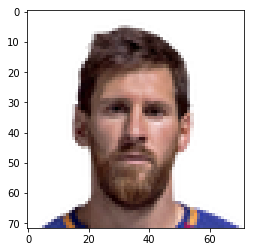

Nome:  L. Messi
ID:  158023
Nacionalidade:  Argentina
Clube:  FC Barcelona


In [ ]:
show_n_players(players, 5)